implement the simple_return function
implement the log_return function


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy import stats
from pandas_datareader import data as wb


In [2]:
stock = input("Enter the stock ticker here: ")

Enter the stock ticker here: HZO


In [3]:
# simple_return() calculate the annualized simple return of a given stock ticker and use default starting date 
# as January first 2000 unless specified
def simple_return(stock, first_date='2000-1-1'):
    #stock = input("Enter the stock ticker here: ")
    ticker = wb.DataReader(stock, data_source='yahoo', start = first_date)
    ticker['Simple Return'] = (ticker['Adj Close'] / ticker['Adj Close'].shift(1)) - 1
    annualized_annual_return = ticker['Simple Return'].mean() * 250
    return annualized_annual_return
    #print (str(round(annualized_annual_return, 4) * 100) + '%')

In [4]:
# for testing “
simple_return(stock)

0.2726199385171205

In [5]:
def log_return(stock, first_date='2000-1-1'):
    ticker = wb.DataReader(stock, data_source='yahoo', start = first_date)
    ticker['Log Return'] = np.log(ticker['Adj Close'] / ticker['Adj Close'].shift(1))
    returns = ticker['Log Return']
    annualized_log_return = ticker['Log Return'].mean() * 250
    return annualized_log_return
    #risk = returns.std() * 250 ** 0.5
    #print('The annualized log return for {} is {}'.format(stock, str(round(annualized_log_return, 4) * 100) + '%'))
    #print('The annualized risk for {} is {}'.format(stock, round(risk, 2)))

In [6]:
log_return(stock)

0.08628441285452326

In [7]:
tickers = ['TD', 'BMO', 'HZO', 'COST']

In [8]:
weight = np.array([0.25, 0.25, 0.25, 0.25])

In [9]:
def portfolio_return(tickers, weight, start='2000-1-1'):
    # printout the return of each stock
    a = []
    d = {}
    for t in tickers:
        s_r = simple_return(t, start)
        a.append(s_r)
        d[t] = str(round(s_r * 100, 2)) + '%'
    data = pd.DataFrame(data=d, index=('return',))
    print(data)
    # generate the portfolio return at the same time with given weight of given stocks
    weighted_return = np.dot(a, weight)
    print("The Portfolio Return is {}".format(str(round((weighted_return * 100), 2)) + '%'))

In [10]:
portfolio_return(tickers, weight)

            TD     BMO     HZO    COST
return  14.94%  15.89%  27.26%  15.52%
The Portfolio Return is 18.41%


In [11]:
# there are two types of risks systematic risk and unsystematic risk
# systematic risk aka non-diversifiable risk
# this is the uncertainty that is characteristic of the entire market which is made of the day to day
# changes in stock prices and is caused by events that affect all companies
# unsystematic risk aka diversible risk
# which is company-specific, even industry-specific, risks that can be smoothed out through diversification

In [12]:
def portfolio_risk(tickers, weight, start='2000-1-1'):
    d = pd.DataFrame()
    w_range = np.size(weight)
    for t in tickers:
        d[t] = wb.DataReader(t, data_source='yahoo',start=start)['Adj Close']
    returns = np.log(d/d.shift(1))
    annual_var = []
    for t in tickers:
        individual_var = returns[t].var() * 250
        annual_var.append(individual_var)
    pfolio_var = np.dot(weight.T, np.dot(returns.cov() * 250, weight))
    d_risk = pfolio_var
    for i in range(w_range):
        d_risk -= (weight[i] ** 2 * annual_var[i])
    print("The diversifiable risk is {}".format(str(round(d_risk * 100, 3)) + '%'))
    # we now calculate the unsystematic risk
    nd_risk = pfolio_var - d_risk
    print("The non-diversifiable risk is {}".format(str(round(nd_risk * 100, 3)) + '%'))

In [13]:
# test case:
portfolio_risk(tickers, weight)

The diversifiable risk is 2.991%
The non-diversifiable risk is 3.623%


In [14]:
# OLS regression for two variables x and y

In [15]:
def regression_analysis(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print("The beta for this regression is {}".format(slope))
    print("The alpha for this regression is {}".format(intercept))
    print("The R squared for this regression is {}".format(r_value ** 2))
    print("The p value for this regression is {}".format(p_value))
    print("The standard error for this regression is {}".format(std_err))

In [16]:
# Markowitz Theory and Efficient Frontier

In [17]:
def markowitz(assets):
    pf_data = pd.DataFrame()
    for a in assets:
        pf_data[a] = wb.DataReader(a, data_source ='yahoo', start='2010-1-1')['Adj Close']
    
    num_assets = len(assets)
    pfolio_returns = []
    pfolio_volatilities = []
    
    log_returns = np.log(pf_data / pf_data.shift(1))
    

    for x in range (1000):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
        pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
    pfolio_returns = np.array(pfolio_returns)
    pfolio_volatilities = np.array(pfolio_volatilities)
    
    portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
    
    portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')

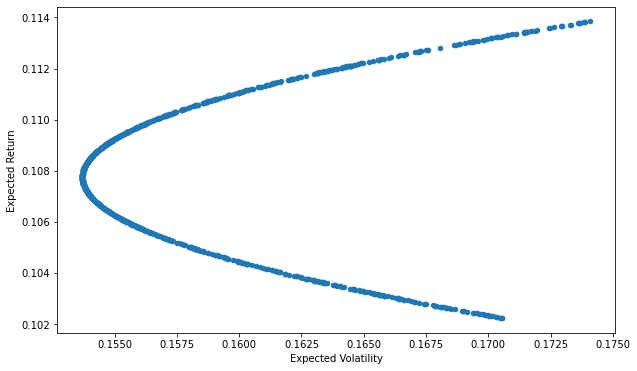

In [18]:
assets = ['PG', '^GSPC']
markowitz(assets)

In [19]:
#beta
# it shows the relationship between a stock and the market
# 0 means no relationship, < 1 means defensive and > 1 means aggressive

In [20]:
def beta_coef(x, y):
    data = pd.DataFrame()
    tickers=[x, y]
    for t in tickers:
        data[t] = wb.DataReader(t, data_source='yahoo', start='2012-1-1', end='2016-12-31')['Adj Close'] 
        
    sec_returns = np.log( data / data.shift(1) )    
    cov = sec_returns.cov() * 250
    cov_with_market = cov.iloc[0,1]
    market_var = sec_returns[y].var() * 250
    beta = cov_with_market / market_var
#     print('the beta for {} is {}'.format(x, beta))
#     if beta == 0:
#         print('the stock shows no relationship with the market')
#     elif beta > 1:
#         print('the stock shows an aggressive relationship with the market')
#     elif beta < 1:
#         print('the stock shows an defensive relationship with the market')
    return beta

In [21]:
beta_coef('PG','^GSPC')

0.6159581469557908

In [22]:
#CAPM Model

In [23]:
def capm(stock, market_i, ten_y_rate, risk_premium):
    beta = float(beta_coef(stock, market_i))
    capm = ten_y_rate * beta * risk_premium
    return capm

In [24]:
# sharpe ratio higher means better

In [25]:
def sharpe(stock, market_i, ten_y_rate, risk_premium,first_date='2000-1-1'):
    sec_return = simple_return(stock, first_date) ** 0.5
    expected_r = capm(stock, market_i, ten_y_rate, risk_premium)
    sharpe = (expected_r - ten_y_rate) / (sec_return)
    return sharpe

In [26]:
sharpe('PG', '^GSPC', 0.025, 0.05)

-0.07898681850901397

In [27]:
# the black sholes formula calculates the value of a call by taking the difference between the amount you get 
# if you exercise the option minus the amount you have to pay if you exercise the option.

In [28]:
def BSM(S, K, r, stdev, T):
        return (S * stats.norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T) * stats.norm.cdf(d2(S, K, r, stdev, T)))

In [29]:
ticker = 'PG'  
data = pd.DataFrame()  
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [30]:
S = data.iloc[-1]
S

PG    80.71093
Name: 2017-03-21 00:00:00, dtype: float64

In [31]:
log_returns = np.log(1 + data.pct_change())

In [32]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.17655
dtype: float64

In [33]:
r = 0.025
K = 110.0
T = 1

In [34]:
def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))
 
def d2(S, K, r, stdev, T):
    return (np.log(S / K) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

In [35]:
d1(S, K, r, stdev, T)

PG   -1.523767
dtype: float64

In [36]:
d2(S, K, r, stdev, T)

PG   -1.700317
dtype: float64

In [37]:
BSM(S, K, r, stdev, T)

PG    0.370057
Name: 2017-03-21 00:00:00, dtype: float64